<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Decision Trees

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Develop a classification model using Decision Tree Algorithm


In this lab exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.


<h1>Table of contents</h1>

<div style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#downloading_data">Downloading the Data</a></li>
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#visualization">Visualization</a></li>
    </ol>
</div>


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use pandas library to read itdirectly into a dataframe from IBM Object Storage.
</div>


In [2]:
from utils import save_file_if_not_exists
from constants import DATA_FOLDER, DRUG_DATA_URL

filename = save_file_if_not_exists(DRUG_DATA_URL, prefix=DATA_FOLDER)
df = pd.read_csv(filename)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>


In [3]:
print(f'dataframe size: {df.size}')
print(f'dataframe shape: {df.shape}')

dataframe size: 1200
dataframe shape: (200, 6)


<details><summary>Click here for the solution</summary>

```python
my_data.shape

```

</details>


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using **df** as the Drug.csv data read by pandas, declare the following variables:
- **X** as the **Feature Matrix**  
- **y** as the **response vector** (target) 



Remove the column containing the target name since it doesn't contain numeric values.


In [4]:
X = df.drop(columns='Drug')
X.head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using the **LabelEncoder() method**
to convert the categorical variable into dummy/indicator variables.


In [5]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])

X.Sex = le_sex.transform(X.Sex)


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X.BP = le_BP.transform(X.BP)


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X.Cholesterol = le_Chol.transform(X.Cholesterol) 

X.head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


Now we can fill the target variable.


In [6]:
y = df["Drug"]
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [7]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

Print the shape of X_train and y_train. Ensure that the dimensions match.


In [10]:
print(f"X_train shape: {X_train.shape}")
print(f'y_train_shape: {y_train.shape}')

X_train shape: (140, 5)
y_train_shape: (140,)


<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

```

</details>


Print the shape of X_testset and y_testset. Ensure that the dimensions match.


In [11]:
print(f"X_test shape: {X_test.shape}")
print(f'y_test_shape: {y_test.shape}')

X_test shape: (60, 5)
y_test_shape: (60,)


<details><summary>Click here for the solution</summary>

```python
print('Shape of X test set {}'.format(X_testset.shape),'&','Size of y test set {}'.format(y_testset.shape))

```

</details>


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [12]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [13]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [14]:
predTree = drugTree.predict(X_test)

You can print out <b>predTree</b> and <b>y_test</b> if you want to visually compare the predictions to the actual values.


In [15]:
print (predTree [0:5])
print (y_test [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


[Text(0.625, 0.9, 'Na_to_K <= 14.615\nentropy = 1.929\nsamples = 140\nvalue = [16, 11, 11, 33, 69]\nclass = drugB'),
 Text(0.5, 0.7, 'BP <= 0.5\nentropy = 1.832\nsamples = 71\nvalue = [16, 11, 11, 33, 0]\nclass = drugA'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'Age <= 50.5\nentropy = 0.975\nsamples = 27\nvalue = [16, 11, 0, 0, 0]\nclass = drugY'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]\nclass = drugY'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]\nclass = drugC'),
 Text(0.75, 0.5, 'Cholesterol <= 0.5\nentropy = 0.811\nsamples = 44\nvalue = [0, 0, 11, 33, 0]\nclass = drugA'),
 Text(0.625, 0.3, 'BP <= 1.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 11, 10, 0]\nclass = drugX'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]\nclass = drugX'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]\nclass = drugA'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 

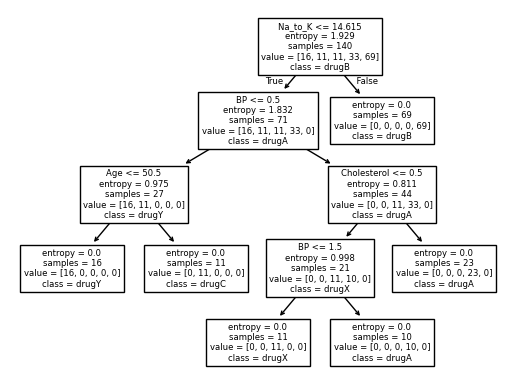

In [26]:
from sklearn.tree import plot_tree
plot_tree(drugTree, feature_names=X.columns, class_names=y.unique())

### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">Joseph Santarcangelo</a>

<a href="https://www.linkedin.com/in/richard-ye/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">Richard Ye</a>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
    
<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                               |
| ----------------- | ------- | ---------- | ------------------------------------------------ |
| 2022-05-24        | 2.3     | Richard Ye | Fixed ability to work in JupyterLite and locally |
| 2020-11-20        | 2.2     | Lakshmi    | Changed import statement of StringIO             |
| 2020-11-03        | 2.1     | Lakshmi    | Changed URL of the csv                           |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab               |
|                   |         |            |                                                  |
|                   |         |            |                                                  |
--!>

